## Phase IV Lea Work

In [1]:
# Load libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sqf2011= pd.read_csv('/Users/leajih-vieira/Documents/GitHub/Data-Science-Project-2950-/PhaseIV_Submission/sqf2011_final_sample')

sqf2019= pd.read_csv('/Users/leajih-vieira/Documents/GitHub/Data-Science-Project-2950-/PhaseIV_Submission/sqf2019_final_sample')


## Defining Functions

### (a) Bootstrapping Function

In [3]:
def bootstrap(df, colname):
    """ Calculate 5000 bootstraps on the colname column in df for a given year. """
    data= df[colname]
    sample_size= data.size
    
    # Bootstrap 5000 times. For each resample, calculate the mean of the sample.
    bootstraps= []

    for i in np.arange(0, 5001):
        resample= np.random.choice(data, sample_size)
        resample_mean= np.average(resample)
        bootstraps= np.append(bootstraps, resample_mean)
        
    return bootstraps

### (b) Contingency Table Function

In [4]:
def get_contingency_table(df, col1_name, col2_name):
    """ Generate a contingency table using the DataFrame df, and the 2 column names provided (Strings) col1_name and col2_name. """
    
    col_a_categories= df[col1_name].unique()
    col_a= pd.Categorical(df[col1_name], categories= col_a_categories)
    
    col_b_categories= df[col2_name].unique()
    col_b= pd.Categorical(df[col2_name], categories= col_b_categories)
    
    return pd.crosstab(col_a, col_b, rownames= [col1_name], colnames= [col2_name])

### (c) Calculate Chi-Squared P-Value Function

In [5]:
def calc_chi_squared(df, col1_name, col2_name):
    """ Calculate the chi-squared p-value of 2 columns from a given DataFrame. """
    cTable= get_contingency_table(df, col1_name, col2_name)
    
    return stats.chi2_contingency(cTable)[1]

## Frisked Predictors (2011)

### (1) Observation Duration

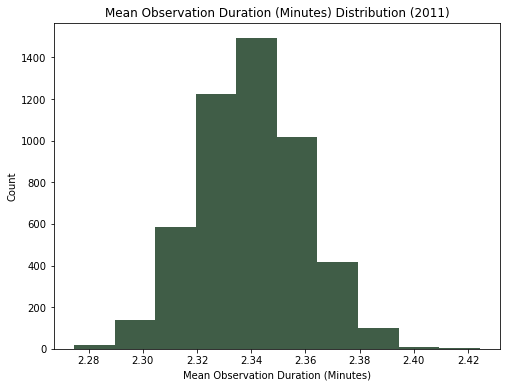

In [74]:
obs_duration_frisked= sqf2011.loc[sqf2011['frisked'] == True]

obs_bootstraps2011= bootstrap(obs_duration_frisked, 'obs_duration')

plt.figure(figsize= (8, 6))
plt.hist(obs_bootstraps2011, color= '#405D47')
plt.xlabel('Mean Observation Duration (Minutes)')
plt.ylabel('Count')
plt.title('Mean Observation Duration (Minutes) Distribution (2011)')
plt.show()

In [7]:
# Calculate the 95% confidence interval
left_bound = np.percentile(obs_bootstraps2011, 2.5)
right_bound = np.percentile(obs_bootstraps2011, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (2.30,  2.38) minutes.


In [8]:
fObs_test_stat2011= np.average(sqf2011.obs_duration)
fObs_pVal2011= sum(obs_bootstraps2011 >= fObs_test_stat2011) / len(obs_bootstraps2011)
fObs_pVal2011 < 0.05

True

### (2) Age

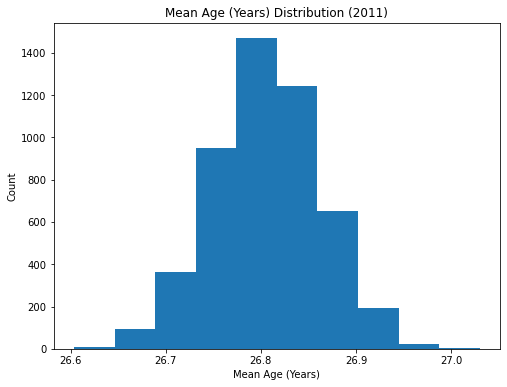

In [9]:
age_frisked= sqf2011.loc[sqf2011['frisked'] == True]

age_bootstraps2011= bootstrap(age_frisked, 'age')

plt.figure(figsize= (8, 6))
plt.hist(age_bootstraps2011)
plt.xlabel('Mean Age (Years)')
plt.ylabel('Count')
plt.title('Mean Age (Years) Distribution (2011)')
plt.show()

In [10]:
# Calculate the 95% confidence interval
left_bound = np.percentile(age_bootstraps2011, 2.5)
right_bound = np.percentile(age_bootstraps2011, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (26.69,  26.92) minutes.


In [11]:
fAge_test_stat2011= np.average(sqf2011.age)
fAge_pVal2011= sum(age_bootstraps2011 >= fAge_test_stat2011) / len(age_bootstraps2011)
fAge_pVal2011 < 0.05

True

### (3) Sex

In [12]:
fSex_pVal2011= calc_chi_squared(sqf2011, 'frisked', 'sex')
fSex_pVal2011 < 0.05

True

### (4) Race

In [13]:
fRace_pVal2011= calc_chi_squared(sqf2011, 'frisked', 'race')
fRace_pVal2011 < 0.05

True

### (5) Boro

In [14]:
fBoro_pVal2011= calc_chi_squared(sqf2011, 'frisked', 'boro')
fBoro_pVal2011 < 0.05

True

## Searched Predictors (2011)

### (1) Observation Duration

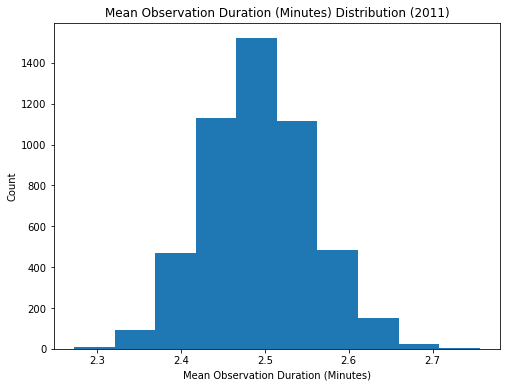

In [15]:
obs_duration_searched= sqf2011.loc[sqf2011['searched'] == True]

obs_bootstraps2011= bootstrap(obs_duration_searched, 'obs_duration')

plt.figure(figsize= (8, 6))
plt.hist(obs_bootstraps2011)
plt.xlabel('Mean Observation Duration (Minutes)')
plt.ylabel('Count')
plt.title('Mean Observation Duration (Minutes) Distribution (2011)')
plt.show()

In [16]:
# Calculate the 95% confidence interval
left_bound = np.percentile(obs_bootstraps2011, 2.5)
right_bound = np.percentile(obs_bootstraps2011, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (2.37,  2.63) minutes.


In [17]:
sObs_test_stat2011= np.average(sqf2011.obs_duration)
sObs_pVal2011= sum(obs_bootstraps2011 >= sObs_test_stat2011) / len(obs_bootstraps2011)
sObs_pVal2011 < 0.05

False

### (2) Age

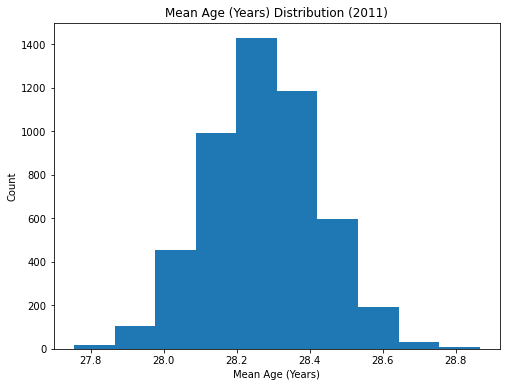

In [18]:
age_searched= sqf2011.loc[sqf2011['searched'] == True]

age_bootstraps2011= bootstrap(age_searched, 'age')

plt.figure(figsize= (8, 6))
plt.hist(age_bootstraps2011)
plt.xlabel('Mean Age (Years)')
plt.ylabel('Count')
plt.title('Mean Age (Years) Distribution (2011)')
plt.show()

In [19]:
# Calculate the 95% confidence interval
left_bound = np.percentile(age_bootstraps2011, 2.5)
right_bound = np.percentile(age_bootstraps2011, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (27.98,  28.57) minutes.


In [20]:
sAge_test_stat2011= np.average(sqf2011.age)
sAge_pVal2011= sum(age_bootstraps2011 >= sAge_test_stat2011) / len(age_bootstraps2011)
sAge_pVal2011 < 0.05

False

### (3) Sex

In [21]:
sSex_pVal2011= calc_chi_squared(sqf2011, 'searched', 'sex')
sSex_pVal2011 < 0.05

True

### (4) Race

In [22]:
sRace_pVal2011= calc_chi_squared(sqf2011, 'searched', 'race')
sRace_pVal2011 < 0.05

True

### (5) Boro

In [23]:
sBoro_pVal2011= calc_chi_squared(sqf2011, 'searched', 'boro')
sBoro_pVal2011 < 0.05

True

## Arrest Made Predictors (2011)

### (1) Observation Duration

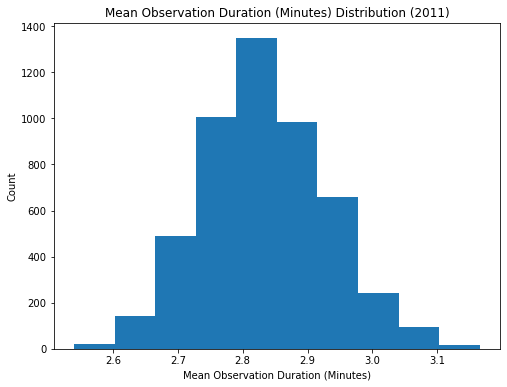

In [24]:
obs_duration_arrest= sqf2011.loc[sqf2011['arstmade'] == True]

obs_bootstraps2011= bootstrap(obs_duration_arrest, 'obs_duration')

plt.figure(figsize= (8, 6))
plt.hist(obs_bootstraps2011)
plt.xlabel('Mean Observation Duration (Minutes)')
plt.ylabel('Count')
plt.title('Mean Observation Duration (Minutes) Distribution (2011)')
plt.show()

In [25]:
# Calculate the 95% confidence interval
left_bound = np.percentile(obs_bootstraps2011, 2.5)
right_bound = np.percentile(obs_bootstraps2011, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (2.66,  3.03) minutes.


In [26]:
aObs_test_stat2011= np.average(sqf2011.obs_duration)
aObs_pVal2011= sum(obs_bootstraps2011 >= aObs_test_stat2011) / len(obs_bootstraps2011)
aObs_pVal2011 < 0.05

False

### (2) Age

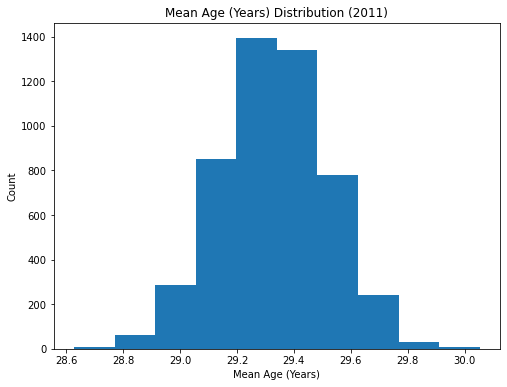

In [27]:
age_arrest= sqf2011.loc[sqf2011['arstmade'] == True]

age_bootstraps2011= bootstrap(age_arrest, 'age')

plt.figure(figsize= (8, 6))
plt.hist(age_bootstraps2011)
plt.xlabel('Mean Age (Years)')
plt.ylabel('Count')
plt.title('Mean Age (Years) Distribution (2011)')
plt.show()

In [28]:
# Calculate the 95% confidence interval
left_bound = np.percentile(age_bootstraps2011, 2.5)
right_bound = np.percentile(age_bootstraps2011, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (28.97,  29.70) minutes.


In [29]:
aAge_test_stat2011= np.average(sqf2011.age)
aAge_pVal2011= sum(age_bootstraps2011 >= aAge_test_stat2011) / len(age_bootstraps2011)
aAge_pVal2011 < 0.05

False

### (3) Sex

In [30]:
aSex_pVal2011= calc_chi_squared(sqf2011, 'arstmade', 'sex')
aSex_pVal2011 < 0.05

True

### (4) Race

In [31]:
aRace_pVal2011= calc_chi_squared(sqf2011, 'arstmade', 'race')
aRace_pVal2011 < 0.05

True

### (5) Boro

In [32]:
aBoro_pVal2011= calc_chi_squared(sqf2011, 'arstmade', 'boro')
aBoro_pVal2011 < 0.05

True

-------------

## Frisked Predictors (2019)

### (1) Observation Duration

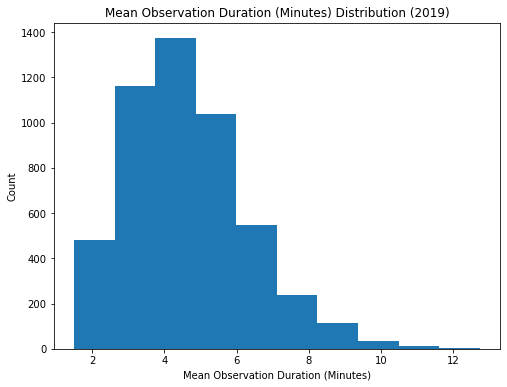

In [33]:
obs_duration_frisked= sqf2019.loc[sqf2019['frisked'] == True]

obs_bootstraps2019= bootstrap(obs_duration_frisked, 'obs_duration')

plt.figure(figsize= (8, 6))
plt.hist(obs_bootstraps2019)
plt.xlabel('Mean Observation Duration (Minutes)')
plt.ylabel('Count')
plt.title('Mean Observation Duration (Minutes) Distribution (2019)')
plt.show()

In [34]:
# Calculate the 95% confidence interval
left_bound = np.percentile(obs_bootstraps2019, 2.5)
right_bound = np.percentile(obs_bootstraps2019, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}).".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (1.72,  8.46).


In [35]:
fObs_test_stat2019= np.average(sqf2019.obs_duration)
fObs_pVal2019= sum(obs_bootstraps2019 >= fObs_test_stat2019) / len(obs_bootstraps2019)
fObs_pVal2019 < 0.05

False

### (2) Age

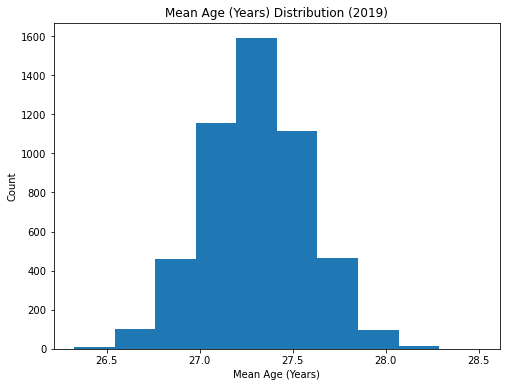

In [36]:
age_frisked= sqf2019.loc[sqf2019['frisked'] == True]

age_bootstraps2019= bootstrap(age_frisked, 'age')

plt.figure(figsize= (8, 6))
plt.hist(age_bootstraps2019)
plt.xlabel('Mean Age (Years)')
plt.ylabel('Count')
plt.title('Mean Age (Years) Distribution (2019)')
plt.show()

In [37]:
# Calculate the 95% confidence interval
left_bound = np.percentile(age_bootstraps2019, 2.5)
right_bound = np.percentile(age_bootstraps2019, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (26.78,  27.84) minutes.


In [38]:
fAge_test_stat2019= np.average(sqf2019.obs_duration)
fObs_pVal2019= sum(obs_bootstraps2019 >= fAge_test_stat2019) / len(obs_bootstraps2019)
fObs_pVal2019 < 0.05

False

### (3) Sex

In [39]:
fSex_pVal2019= calc_chi_squared(sqf2019, 'frisked', 'sex')
fSex_pVal2019 < 0.05

True

### (4) Race

In [40]:
fRace_pVal2019= calc_chi_squared(sqf2019, 'frisked', 'race')
fRace_pVal2019 < 0.05

True

### (5) Boro

In [41]:
fBoro_pVal2019= calc_chi_squared(sqf2019, 'frisked', 'boro')
fBoro_pVal2019 < 0.05

True

## Searched Predictors (2019)

### (1) Observation Duration

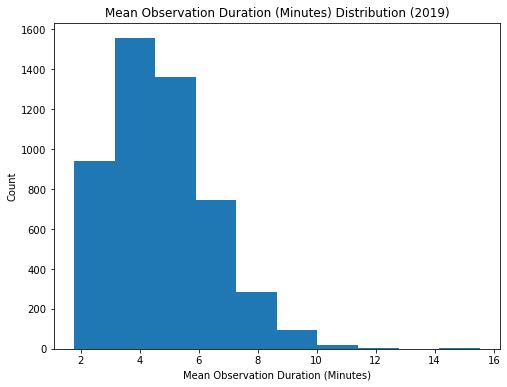

In [42]:
obs_duration_searched= sqf2019.loc[sqf2019['searched'] == True]

obs_bootstraps2019= bootstrap(obs_duration_searched, 'obs_duration')

plt.figure(figsize= (8, 6))
plt.hist(obs_bootstraps2019)
plt.xlabel('Mean Observation Duration (Minutes)')
plt.ylabel('Count')
plt.title('Mean Observation Duration (Minutes) Distribution (2019)')
plt.show()

In [43]:
# Calculate the 95% confidence interval
left_bound = np.percentile(obs_bootstraps2019, 2.5)
right_bound = np.percentile(obs_bootstraps2019, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}).".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (2.16,  8.58).


In [44]:
sObs_test_stat2019= np.average(sqf2019.obs_duration)
sObs_pVal2019= sum(obs_bootstraps2019 >= sObs_test_stat2019) / len(obs_bootstraps2019)
sObs_pVal2019 < 0.05

False

### (2) Age

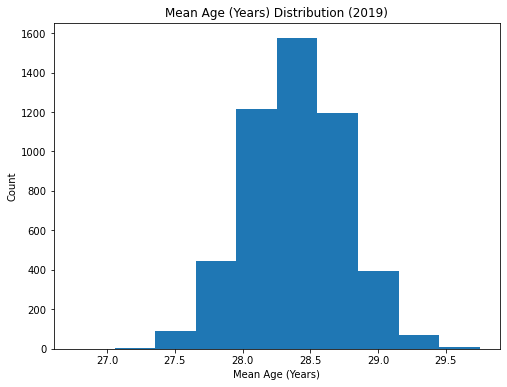

In [45]:
age_searched= sqf2019.loc[sqf2019['searched'] == True]

age_bootstraps2019= bootstrap(age_searched, 'age')

plt.figure(figsize= (8, 6))
plt.hist(age_bootstraps2019)
plt.xlabel('Mean Age (Years)')
plt.ylabel('Count')
plt.title('Mean Age (Years) Distribution (2019)')
plt.show()

In [46]:
# Calculate the 95% confidence interval
left_bound = np.percentile(age_bootstraps2019, 2.5)
right_bound = np.percentile(age_bootstraps2019, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (27.71,  29.09) minutes.


In [47]:
sAge_test_stat2019= np.average(sqf2019.obs_duration)
sObs_pVal2019= sum(obs_bootstraps2019 >= sAge_test_stat2019) / len(obs_bootstraps2019)
sObs_pVal2019 < 0.05

False

### (3) Sex

In [48]:
sSex_pVal2019= calc_chi_squared(sqf2019, 'searched', 'sex')
sSex_pVal2019 < 0.05

True

### (4) Race

In [49]:
sRace_pVal2019= calc_chi_squared(sqf2019, 'searched', 'race')
sRace_pVal2019 < 0.05

False

### (5) Boro

In [50]:
sBoro_pVal2019= calc_chi_squared(sqf2019, 'searched', 'boro')
sBoro_pVal2019 < 0.05

False

## Arrest Made Predictors (2019)

### (1) Observation Duration

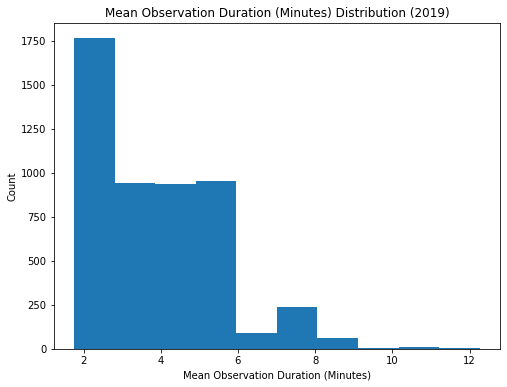

In [51]:
obs_duration_arrest= sqf2019.loc[sqf2019['arstmade'] == True]

obs_bootstraps2019= bootstrap(obs_duration_arrest, 'obs_duration')

plt.figure(figsize= (8, 6))
plt.hist(obs_bootstraps2019)
plt.xlabel('Mean Observation Duration (Minutes)')
plt.ylabel('Count')
plt.title('Mean Observation Duration (Minutes) Distribution (2019)')
plt.show()

In [52]:
# Calculate the 95% confidence interval
left_bound = np.percentile(obs_bootstraps2019, 2.5)
right_bound = np.percentile(obs_bootstraps2019, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}).".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (1.97,  7.31).


In [53]:
aObs_test_stat2019= np.average(sqf2019.obs_duration)
aObs_pVal2019= sum(obs_bootstraps2019 >= aObs_test_stat2019) / len(obs_bootstraps2019)
aObs_pVal2019 < 0.05

False

### (2) Age

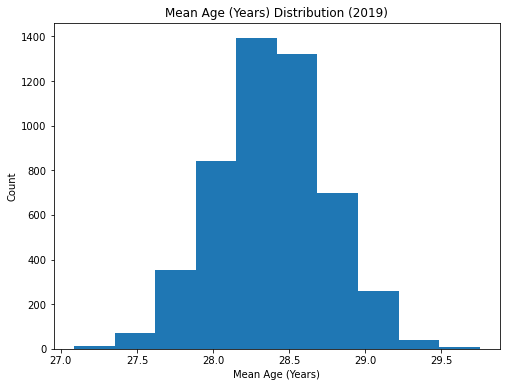

In [54]:
age_arrest= sqf2019.loc[sqf2019['arstmade'] == True]

age_bootstraps2019= bootstrap(age_searched, 'age')

plt.figure(figsize= (8, 6))
plt.hist(age_bootstraps2019)
plt.xlabel('Mean Age (Years)')
plt.ylabel('Count')
plt.title('Mean Age (Years) Distribution (2019)')
plt.show()

In [55]:
# Calculate the 95% confidence interval
left_bound = np.percentile(age_bootstraps2019, 2.5)
right_bound = np.percentile(age_bootstraps2019, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (27.67,  29.09) minutes.


In [56]:
aAge_test_stat2019= np.average(sqf2019.obs_duration)
aObs_pVal2019= sum(obs_bootstraps2019 >= aAge_test_stat2019) / len(obs_bootstraps2019)
aObs_pVal2019 < 0.05

False

### (3) Sex

In [57]:
aSex_pVal2019= calc_chi_squared(sqf2019, 'arstmade', 'sex')
aSex_pVal2019 < 0.05

False

### (4) Race

In [58]:
aRace_pVal2019= calc_chi_squared(sqf2019, 'arstmade', 'race')
aRace_pVal2019 < 0.05

False

### (5) Boro

In [59]:
aBoro_pVal2019= calc_chi_squared(sqf2019, 'arstmade', 'boro')
aBoro_pVal2019 < 0.05

False

--------

## Notes:

- How the Bootstraps were Calculated:
    - Retrieved a subset of the data for a given predictor variable where the target variable == True (Ex: retrieved all age data where frisked == True)
    - Bootstrapped this data 5,000 times (should we increase the number of bootstraps?)
    - Calculated the test statistic for the Null Hypothesis by calculating the average of the entire sample for a given predictor variable
    - Calculated the p-value by calculating the proportion of bootstrapped sample means >= the Null test statistic


- The confidence intervals associated with each bootstrapping are not necessary. I calculated the confidence intervals in the event that we would want to use them in our analysis of the data.

## Source Code:

- [Our GitHub Repository](https://github.com/leajv123/Data-Science-Project-2950-)

## Acknowledgements:

- INFO 2950: Introduction to Data Science Lecture Code.
- INFO 2950: Introduction to Data Science Teaching Staff for answering questions during Class, Office Hours, and via email.
- ORIE 1380: Data Science for All Homework and Lab Code (Spring 2020).
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [NumPy](https://numpy.org/doc/), [SciKit-Learn](https://scikit-learn.org/stable/), and [MatPlotLib](https://matplotlib.org/) Documentation.
- Consulted various [Stack Overflow](https://stackoverflow.com/) posts for clarification on how to use functions in the packages listed above.
- Chi-Squared Test of Independence [Null and Alternative Hypothesis](https://www.statisticssolutions.com/non-parametric-analysis-chi-square/#:~:text=Alternative%20hypothesis%3A%20Assumes%20that%20there,association%20between%20the%20two%20variables.&text=If%20the%20observed%20chi%2Dsquare,interpret%20your%20analysis%20in%20minutes.) resources.

----------

## Analyzing the Efficacy of Stopping and Frisking 

In [60]:
def percent_effective(df, numeratorColName, denominatorColName):
    """ Calculate the percent efficacy of """
    if type(numeratorColName) == list:
        num= sum(df.loc[df[denominatorColName] == True][numeratorColName].sum(axis= 1))
        den= len(df[denominatorColName] == True)
        return num / den * 100
    
    num= sum(df.loc[df[denominatorColName] == True][numeratorColName])
    den= len(df[denominatorColName] == True)
    return num / den * 100

### Stop and Frisk (2011)

#### (a) Out of the People Stopped, Who of Those that were Frisked Had a Weapon and/or Contraband on them?

In [61]:
# (People who had a weapon and/or contraband of those frisked) /(People frisked)
percent_effective(sqf2011, ['contraband', 'firearm', 'knife', 'other_weapon'], 'frisked')

2.447219002626212

#### (b) Out of the People Stopped, Who of Those that were Frisked Had a Weapon on them?

In [62]:
# (People who had a weapon of those frisked) /(People frisked)
percent_effective(sqf2011, ['firearm', 'knife', 'other_weapon'], 'frisked')

1.0240760574538945

#### (c) Out of the People Stopped, Who of Those that were Frisked Had Contraband on them?

In [63]:
# (People who had contraband of those searched) /(People searched)
percent_effective(sqf2011, 'contraband', 'frisked')

1.4231429451723177

#### (d) Out of the People Stopped, Who of Those that were Searched Had a Weapon and/or Contraband on them?

In [64]:
# (People who had a weapon and/or contraband of those searched) /(People searched)
percent_effective(sqf2011, ['contraband', 'firearm', 'knife', 'other_weapon'], 'searched')

1.899969189688816

#### (e) Out of the People Stopped, Who of Those that were Searched Had a Weapon on them?

In [65]:
# (People who had a weapon of those searched) /(People searched)
percent_effective(sqf2011, ['firearm', 'knife', 'other_weapon'], 'searched')

0.7790607256561862

#### (f) Out of the People Stopped, Who of Those that were Searched Had Contraband on them?

In [66]:
# (People who had contraband of those searched) /(People searched)
percent_effective(sqf2011, 'contraband', 'searched')

1.1209084640326297

### Stop and Frisk (2019)

#### (a) Out of the People Stopped, Who of Those that were Frisked Had a Weapon and/or Contraband on them?

In [67]:
# (People who had a weapon and/or contraband of those frisked) /(People frisked)
percent_effective(sqf2019, ['contraband', 'firearm', 'knife', 'other_weapon'], 'frisked')

19.428200129954515

#### (b) Out of the People Stopped, Who of Those that were Frisked Had a Weapon on them?

In [68]:
# (People who had a weapon of those frisked) /(People frisked)
percent_effective(sqf2019, ['firearm', 'knife', 'other_weapon'], 'frisked')

14.587394411955815

#### (c) Out of the People Stopped, Who of Those that were Frisked Had Contraband on them?

In [69]:
# (People who had contraband of those searched) /(People searched)
percent_effective(sqf2019, 'contraband', 'frisked')

4.8408057179987

#### (d) Out of the People Stopped, Who of Those that were Searched Had a Weapon and/or Contraband on them?

In [70]:
# (People who had a weapon and/or contraband of those searched) /(People searched)
percent_effective(sqf2019, ['contraband', 'firearm', 'knife', 'other_weapon'], 'searched')

21.604938271604937

#### (e) Out of the People Stopped, Who of Those that were Searched Had a Weapon on them?

In [71]:
# (People who had a weapon of those searched) /(People searched)
percent_effective(sqf2019, ['firearm', 'knife', 'other_weapon'], 'searched')

14.9772579597141

#### (f) Out of the People Stopped, Who of Those that were Searched Had Contraband on them?

In [72]:
# (People who had contraband of those searched) /(People searched)
percent_effective(sqf2019, 'contraband', 'searched')

6.627680311890838

-------

## X. Appendix: Data Cleaning Description

#### Dataset #1: Stop, Question, and Frisk (2011)

We are going to be using 2 Stop and Frisk datasets for this project, one from 2011 and the other from 2019. Over time, the NYPD has modified the methods in which the data is recorded, causing the 2011 and 2019 datasets to have a lot of the same data stored in different ways. A large portion of the data cleaning will be adjusting column names and re-encoding data in order to make analysis easier.

1. Dropped a list of column names that were irrelevant to our analysis, or columns that contained little to no data. The columns in this list are
    - pct: PRECINCT OF STOP (FROM 1 TO 123)
    - ser_num: UF250 SERIAL NUMBER
    - recstat: RECORD STATUS
    - inout: WAS STOP INSIDE OR OUTSIDE?
    - trhsloc: WAS LOCATION HOUSING OR TRANSIT AUTHORITY
    - typeofid: STOPPED PERSON'S IDENTIFICATION TYPE
    - sumoffen: OFFENSE SUSPECT WAS SUMMONSED FOR
    - compyear: COMPLAINT YEAR (IF COMPLAINT REPORT PREPARED)
    - comppct: COMPLAINT PRECINCT (IF COMPLAINT REPORT PREPARED)
    - offunif: WAS OFFICER IN UNIFORM?
    - officrid: ID CARD PROVIDED BY OFFICER (IF NOT IN UNIFORM)
    - adtlrept: WERE ADDITIONAL REPORTS PREPARED?
    - radio: RADIO RUN
    - ac_rept: ADDITIONAL CIRCUMSTANCES - REPORT BY VICTIM/WITNESS/OFFICER
    - ac_inves: ADDITIONAL CIRCUMSTANCES - ONGOING INVESTIGATION
    - rf_vcrim: REASON FOR FRISK - VIOLENT CRIME SUSPECTED
    - rf_othsw: REASON FOR FRISK - OTHER SUSPICION OF WEAPONS
    - ac_proxm: ADDITIONAL CIRCUMSTANCES - PROXIMITY TO SCENE OF OFFENSE
    - rf_attir: REASON FOR FRISK - INAPPROPRIATE ATTIRE FOR SEASON
    - cs_objcs: REASON FOR STOP - CARRYING SUSPICIOUS OBJECT
    - cs_descr: REASON FOR STOP - FITS A RELEVANT DESCRIPTION
    - cs_casng: REASON FOR STOP - CASING A VICTIM OR LOCATION
    - cs_lkout: REASON FOR STOP - SUSPECT ACTING AS A LOOKOUT
    - rf_vcact: REASON FOR FRISK-  ACTIONS OF ENGAGING IN A VIOLENT CRIME
    - cs_cloth: REASON FOR STOP - WEARING CLOTHES COMMONLY USED IN A CRIME
    - cs_drgtr: REASON FOR STOP - ACTIONS INDICATIVE OF A DRUG TRANSACTION
    - ac_evasv: ADDITIONAL CIRCUMSTANCES - EVASIVE RESPONSE TO QUESTIONING
    - ac_assoc: ADDITIONAL CIRCUMSTANCES - ASSOCIATING WITH KNOWN CRIMINALS
    - cs_furtv: REASON FOR STOP - FURTIVE MOVEMENTS
    - rf_rfcmp: REASON FOR FRISK - REFUSE TO COMPLY W OFFICER'S DIRECTIONS
    - ac_cgdir: ADDITIONAL CIRCUMSTANCES - CHANGE DIRECTION AT SIGHT OF OFFICER
    - rf_verbl: REASON FOR FRISK - VERBAL THREATS BY SUSPECT
    - cs_vcrim: REASON FOR STOP - ACTIONS OF ENGAGING IN A VIOLENT CRIME
    - cs_bulge: REASON FOR STOP - SUSPICIOUS BULGE
    - cs_bulge: REASON FOR STOP - OTHER
    - ac_incid: ADDITIONAL CIRCUMSTANCES - AREA HAS HIGH CRIME INCIDENCE
    - ac_time: ADDITIONAL CIRCUMSTANCES - TIME OF DAY FITS CRIME INCIDENCE
    - rf_knowl: REASON FOR FRISK - KNOWLEDGE OF SUSPECT'S PRIOR CRIM BEHAV
    - ac_stsnd: ADDITIONAL CIRCUMSTANCES - SIGHTS OR SOUNDS OF CRIMINAL ACTIVITY
    - ac_other: ADDITIONAL CIRCUMSTANCES - OTHER
    - sb_hdobj: BASIS OF SEARCH - HARD OBJECT
    - sb_outln: BASIS OF SEARCH - OUTLINE OF WEAPON
    - sb_admis: BASIS OF SEARCH - ADMISSION BY SUSPECT
    - sb_other: BASIS OF SEARCH - OTHER
    - repcmd: REPORTING OFFICER'S COMMAND (1 TO 999)
    - revcmd: REVIEWING OFFICER'S COMMAND (1 TO 999)
    - rf_furt: REASON FOR FRISK - FURTIVE MOVEMENTS
    - rf_bulg: REASON FOR FRISK - SUSPICIOUS BULGE
    - offverb: VERBAL STATEMENT PROVIDED BY OFFICER (IF NOT IN UNIFORM)
    - offshld: SHIELD PROVIDED BY OFFICER (IF NOT IN UNIFORM)
    - forceuse: REASON FORCE USED
    - dob: SUSPECT'S DATE OF BIRTH (CCYY-MM-DD)
    - ht_feet: SUSPECT'S HEIGHT (FEET)
    - ht_inch: SUSPECT'S HEIGHT (INCHES)
    - weight: SUSPECT'S WEIGHT
    - haircolr: SUSPECT'S HAIRCOLOR
    - eyecolor: SUSPECT'S EYE COLOR
    - build: SUSPECT'S BUILD
    - othfeatr: SUSPECT'S OTHER FEATURES (SCARS, TATOOS ETC.)
    - addrtyp: LOCATION OF STOP ADDRESS TYPE
    - rescode: LOCATION OF STOP RESIDENT CODE
    - premtype: LOCATION OF STOP PREMISE TYPE
    - premname: LOCATION OF STOP PREMISE NAME
    - addrnum: LOCATION OF STOP ADDRESS NUMBER
    - stname: LOCATION OF STOP STREET NAME
    - stinter: LOCATION OF STOP INTERSECTION
    - crossst: LOCATION OF STOP CROSS STREET
    - aptnum: LOCATION OF STOP APT NUMBER
    - state: LOCATION OF STOP STATE
    - zip: LOCATION OF STOP ZIP CODE
    - addrpct: LOCATION OF STOP ADDRESS PRECINCT
    - sector: LOCATION OF STOP SECTOR
    - beat: LOCATION OF STOP BEAT
    - post: LOCATION OF STOP POST
    - xcoord: LOCATION OF STOP X COORD
    - ycoord: LOCATION OF STOP Y COORD
    - dettypCM: DETAILS TYPES CODE
    - lineCM: COUNT >1 ADDITIONAL DETAILS
    
- After dropping these columns, the remaining columns are
    - year: YEAR OF STOP (CCYY)
    - datestop: DATE OF STOP (MM-DD-YYYY)
    - timestop: TIME OF STOP (HH:MM)
    - perobs: PERIOD OF OBSERVATION (MMM)
    - crimsusp: CRIME SUSPECTED
    - perstop: PERIOD OF STOP (MMM)
    - explnstp: DID OFFICER EXPLAIN REASON FOR STOP?
    - othpers: WERE OTHER PERSONS STOPPED, QUESTIONED OR FRISKED?
    - arstmade: WAS AN ARREST MADE?
    - arstoffn: OFFENSE SUSPECT ARRESTED FOR
    - sumissue: WAS A SUMMONS ISSUED?
    - frisked: WAS SUSPECT FRISKED?
    - searched: WAS SUSPECT SEARCHED?
    - contrabn: WAS CONTRABAND FOUND ON SUSPECT?
    - pistol: WAS A PISTOL FOUND ON SUSPECT?
    - riflshot: WAS A RIFLE FOUND ON SUSPECT?
    - asltweap: WAS AN ASSAULT WEAPON FOUND ON SUSPECT?
    - knifcuti: WAS A KNIFE OR CUTTING INSTRUMENT FOUND ON SUSPECT?
    - machgun: WAS A MACHINE GUN FOUND ON SUSPECT?
    - othrweap: WAS ANOTHER TYPE OF WEAPON FOUND ON SUSPECT
    - pf_hands: PHYSICAL FORCE USED BY OFFICER - HANDS
    - pf_wall: PHYSICAL FORCE USED BY OFFICER - SUSPECT AGAINST WALL
    - pf_grnd: PHYSICAL FORCE USED BY OFFICER - SUSPECT ON GROUND
    - pf_drwep: PHYSICAL FORCE USED BY OFFICER - WEAPON DRAWN
    - pf_ptwep: PHYSICAL FORCE USED BY OFFICER - WEAPON POINTED
    - pf_baton: PHYSICAL FORCE USED BY OFFICER - BATON
    - pf_hcuff: PHYSICAL FORCE USED BY OFFICER - HANDCUFFS
    - pf_pepsp: PHYSICAL FORCE USED BY OFFICER - PEPPER SPRAY
    - pf_other: PHYSICAL FORCE USED BY OFFICER - OTHER
    - sex: SUSPECT'S SEX
    - race: SUSPECT'S RACE
    - age: SUSPECT'S AGE
    - city: LOCATION OF STOP CITY
    - detailCM: CRIME CODE DESCRIPTION

2. The next step is to rename the remaining columns with a standardized naming method that will be applied to both the 2011 and 2019 Stop and Frisk datasets. Here is the list of renamed columns:
    - datestop -> date
    - timestop -> time
    - perobs -> obs_duration
    - perstop -> stop_duration
    - explnstp -> off_explain
    - othpers -> other_stop
    - contrabn -> contraband
    - knifcuti -> knife
    - othrweap -> other_weapon
    - city -> boro
    - detailcm -> crime_sus

3. The Stop, Question, and Frisk dataset has multiple columns dedicated to whether weapons were found on the subject. These columns include:
    - pistol: WAS A PISTOL FOUND ON SUSPECT?
    - riflshot: WAS A RIFLE FOUND ON SUSPECT?
    - asltweap: WAS AN ASSAULT WEAPON FOUND ON SUSPECT?
    - knifcuti: WAS A KNIFE OR CUTTING INSTRUMENT FOUND ON SUSPECT?
    - machgun: WAS A MACHINE GUN FOUND ON SUSPECT?
    - othrweap: WAS ANOTHER TYPE OF WEAPON FOUND ON SUSPECT

The methods in which weapons data was recorded in the 2011 dataset differ from the methods used in the 2019 dataset. To resolve these differentiations, the weapons data is condensed into 3 columns: firearm, knife, and other_weapon.

4. When an officer uses physical force on a suspect, there are many categories that the physical force can be classified into: hands, suspect against wall, suspect on ground, weapon drawn, weapon pointed, baton, handcuffs, pepper spray, and other. We are mainly interested in whether or not a weapon was drawn and / or pointed. In order to condense the physical force data, we made a general physical force column that records whether or not any physical force was used during the encounter, but will be keeping a separate column specifying if a weapon was drawn and / or pointed during the encounter. These two columns are named phys_force, and pt_draw_force.

Another aspect of the dataset that we have to account for is the age column. In the age column, it seems that if an officer did not know the age of the suspect, the age was coded as a number far above what is humanly possible - anywhere from ~145 to 999. Part of this error could also be due to typos. For example, when entering the police report into the dataset, an officer could have added an extra 0 to '15' to make it '150'. We made the executive decision to drop any rows that had an age listed above 110, because it is not realistic to analyze this when we do not know the real age of the suspect. In addition, we will be using age data a lot in out analysis, so these errors would disrupt later analysis.

There is also prevalence of instances with a remarkably low age, such as 0 or 1. These could be real ages of suspects who were stopped - perhaps they were infants accompanyed by an adult and both were stopped and searched - but we also considered that these ages were due to typos as well. Because of this, we made another executive decision to drop any instances of people below the age of 13.

5. After dropping the low ages and high ages, the subset we will be looking at will be inclusive of teenagers (ages 13-17) and adults (ages 18-110).

6. Boro data will be an important part of our analysis, so we checked for any instances where Boro contained an empty value. For all of the instances where Boro was empty, we dropped the row.

7. The Race data in 2011 was coded using codes that differed from the 2019 dataset. To resolve this, we recoded the race data in 2011 with the full names of each racial category. A similar recoding step was done to the Sex data as well.

8. The Observation Duration data and Stop Duration data seemed to have encoded 'dummy' values of 999 when the Stop Duration and/or Observation Duration was unknown. There is no documentation of this practice in the dataset's specifications, so there was an element of inference our group had to make to come to this conclusion. However, it is likely that 999 is code for unknown because there are a handful of 999 values in these columns, and it is the max value present in both columns. If we were to keep these 999 values, they would definitely cause issues with analysis later because they are extreme outliers in the datasets. For these reasons, we dropped all instances of Observation Duration and Stop Duration that contained a value of 999.

9. All columns whose data can be represented by True/False values were recoded as boolean values. The columns that were coverted to boolean data include
    - off_explain
    - other_stop
    - arstmade
    - sumissue
    - frisked
    - searched
    - contraband
    - knife
    - other_weapon

10. The last step is to convert the date and time columns into datetime objects.

Now, the Stop, Question, and Frisk (2011) dataset cleaning has been completed.

#### Dataset #2: Stop, Question, and Frisk (2019)

The Stop, Question, and Frisk (2019) dataset went through similar data cleaning steps as the 2011 dataset. Steps 1-6 were relatively similar as listed above, except that the Weapons and Physical Force data was stored using different methods than the 2011 dataset. For example, the 2019 dataset only contained one column indicating whether a suspect carried a firearm on them, labeled firearm. The 2011 dataset, on the other hand, differentiated between pistols, rifles, assault weapons, and machine guns. After cleaning these columns, though, both datasets' data is recorded using the same parameters so the data can be compared for analysis.

Step 7 was unnecessary for the 2019 dataset because race data was already coded using the racial categories' full names. The only necessary modification to the race data was to recode races from '(null)' to 'UNKNOWN'.

Step 8 was also unnecessary because the 2019 dataset did not contain any 999 values for Observation Duration or Stop Duration.

Steps 9 and 10 were applied to the 2019 dataset, completing the data cleaning for the Stop, Question, and Frisk (2019) dataset.

#### Dataset #3: New York City Crime Data (2009-2019)